<a href="https://colab.research.google.com/github/RoisulIslamRumi/COMP8740/blob/main/MLExplorers_project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# An analytical revisit to improve tourist attractions implementing classical clustering algorithms
Dataset : https://archive.ics.uci.edu/ml/datasets/Tarvel+Review+Ratings

**Research Questions:**


1.   Which attractions should be prioritized more by the government and local authorities to provide better customer satisfaction in Europe.

2.   What type of attractions are more visited in general in Europe.
3. Recommend which attraction an user should visit next (Recommender System).




# Clusters
**Food**:
* Attribute 10 : Average ratings on restaurants
* Attribute 11 : Average ratings on pubs/bars
*Attribute 13 : Average ratings on burger/pizza shops
*Attribute 15 : Average ratings on juice bars
*Attribute 20 : Average ratings on bakeries
*Attribute 22 : Average ratings on cafes

**Hotel**:
* Attribute 3 : Average ratings on resorts
* Attribute 14 : Average ratings on hotels/other lodgings

**Fitness and activity:**
* Attribute 17 : Average ratings on dance clubs
*Attribute 18 : Average ratings on swimming pools
*Attribute 19 : Average ratings on gyms
*Attribute 21 : Average ratings on beauty & spas

**Natural:**
* Attribute 4 : Average ratings on beaches
*Attribute 5 : Average ratings on parks
*Attribute 23 : Average ratings on view points
*Attribute 25 : Average ratings on gardens

**Artificial**
* Attribute 2 : Average ratings on churches
* Attribute 6 : Average ratings on theatres
*Attribute 7 : Average ratings on museums
*Attribute 8 : Average ratings on malls
*Attribute 9 : Average ratings on zoo
*Attribute 12 : Average ratings on local services
*Attribute 16 : Average ratings on art galleries
*Attribute 24 : Average ratings on monuments



**Strategy 1:** Conduct EDA & after that create clusters using all the clusters. Based on the sizes of the clusters two things could be achieved.
1. Predict where a new user should go next
2. Based on the sizes of the clusters predict which clusters need more work.

**Strategy 2:** Conduct EDA & after that create clusters.
1. Get random SSU (Secondary sampling units) from clusters.
2. Based on the SSU we can conclude which attractions need more work.



In [ ]:
#import libraries

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import time
import sklearn.metrics as metrics

#read dataset
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00485/google_review_ratings.csv')
# df.head()


**EDA**

In [ ]:
#the below string bad formatting, so changed it to 0
df.loc[2712,['Category 11']] = 0

In [ ]:
#changed dtype from obj to float
df['Category 11'] = pd.to_numeric(df['Category 11'])
df.head()

,User,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,Category 11,Category 12,Category 13,Category 14,Category 15,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,Unnamed: 25
0,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64,1.70,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
1,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65,1.70,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
2,User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,1.70,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
3,User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64,1.73,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
4,User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,1.70,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN


In [ ]:
df.info()
# columns that'll be used for analysis are Quantitative data(continuous)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   User         5456 non-null   object 
 1   Category 1   5456 non-null   float64
 2   Category 2   5456 non-null   float64
 3   Category 3   5456 non-null   float64
 4   Category 4   5456 non-null   float64
 5   Category 5   5456 non-null   float64
 6   Category 6   5456 non-null   float64
 7   Category 7   5456 non-null   float64
 8   Category 8   5456 non-null   float64
 9   Category 9   5456 non-null   float64
 10  Category 10  5456 non-null   float64
 11  Category 11  5456 non-null   float64
 12  Category 12  5455 non-null   float64
 13  Category 13  5456 non-null   float64
 14  Category 14  5456 non-null   float64
 15  Category 15  5456 non-null   float64
 16  Category 16  5456 non-null   float64
 17  Category 17  5456 non-null   float64
 18  Category 18  5456 non-null   float64
 19  Catego

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Category 1,5456.0,1.455720,0.827604,0.00,0.920,1.340,1.8100,5.00
Category 2,5456.0,2.319707,1.421438,0.00,1.360,1.905,2.6825,5.00
Category 3,5456.0,2.489331,1.247815,0.00,1.540,2.060,2.7400,5.00
Category 4,5456.0,2.796886,1.309159,0.83,1.730,2.460,4.0925,5.00
Category 5,5456.0,2.958941,1.339056,1.12,1.770,2.670,4.3125,5.00
Category 6,5456.0,2.893490,1.282400,1.11,1.790,2.680,3.8400,5.00
Category 7,5456.0,3.351395,1.413492,1.12,1.930,3.230,5.0000,5.00
Category 8,5456.0,2.540795,1.111391,0.86,1.620,2.170,3.1900,5.00
Category 9,5456.0,3.126019,1.356802,0.84,1.800,2.800,5.0000,5.00
Category 10,5456.0,2.832729,1.307665,0.81,1.640,2.680,3.5300,5.00


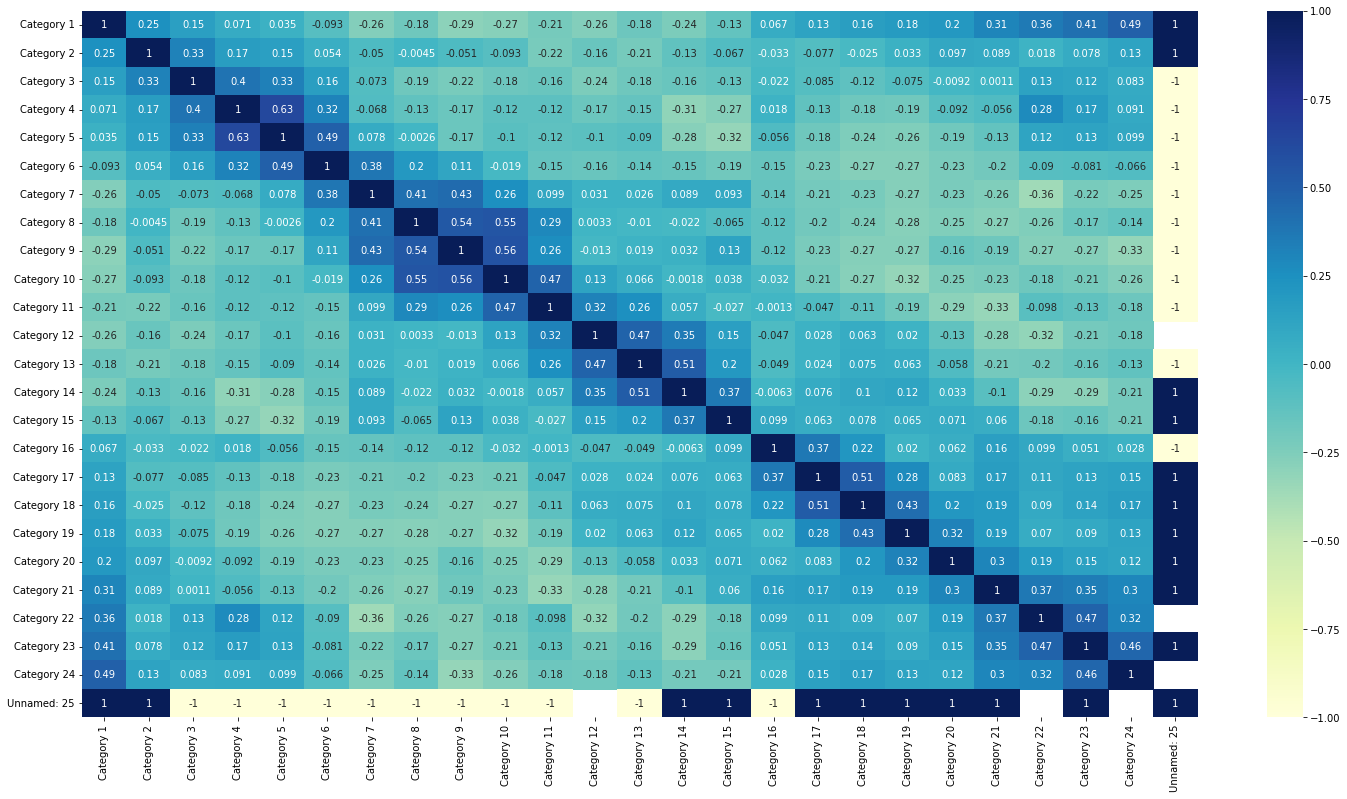

In [ ]:
plt.rcParams["figure.figsize"] = (25,13)
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [ ]:
#there are only 2 datapoints for the Unnamed category.
#Uer column doesn't have anything to do with analysis.
#Drop user and unnamed column
df.drop(['Unnamed: 25'],axis=1,inplace=True)
#tmp_df = df.copy()
#df.drop(['User',],axis=1,inplace=True)
df.drop(['User','Category 5', 'Category 8', 'Category 9','Category 13', 'Category 17'],axis=1,inplace=True)


In [ ]:
#missing value handling
#null detector
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]
rows_with_NaN

,Category 1,Category 2,Category 3,Category 4,Category 6,Category 7,Category 10,Category 11,Category 12,Category 14,Category 15,Category 16,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24
1347,1.06,1.10,5.00,3.28,5.00,5.00,5.00,5.0,1.74,1.74,1.77,1.80,0.00,0.0,0.00,0.0,5.0,0.26,NaN
2712,1.71,1.68,1.46,1.13,1.15,1.26,0.85,0.0,NaN,5.00,5.00,1.08,1.04,5.0,4.43,5.0,5.0,5.00,2.57


In [ ]:
#null handling
df['Category 12'] = df['Category 12'].fillna(0)
df['Category 24'] = df['Category 24'].fillna(0)

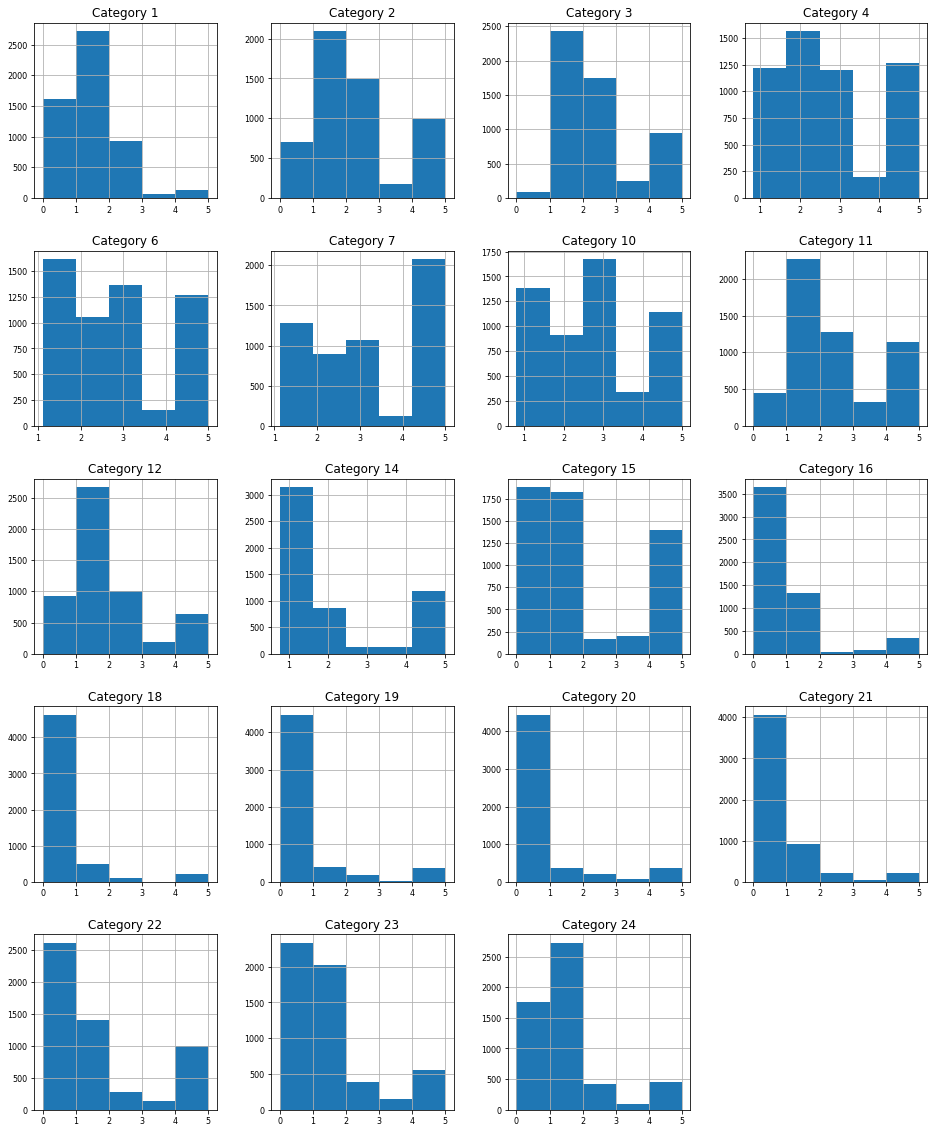

In [ ]:
#Numerical data distribution
df_num = df.select_dtypes(include='float64')
df_num.hist(figsize=(16, 20), bins=5, xlabelsize=8, ylabelsize=8)
plt.show()

It can be seen from the heatmap that 9 features have moderate correlation. From which several conclusions can be made.


1.   Beaches & Parks
2.   Malls, zoo, restaurants
3.   burger/pizza shops & hotels/other lodgings
4.   dance clubs & swimming pools



In [ ]:
#df[['Category 4', 'Category 5', 'Category 8', 'Category 9','Category 10','Category 13','Category 14', 'Category 17','Category 18']].corr()  

Text(0, 0.5, 'Inertia')

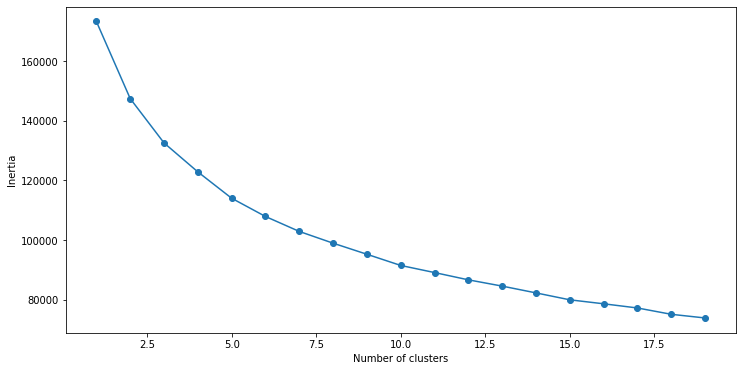

In [ ]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(df)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [ ]:

# k means using 10 clusters and k-means++ initialization
# inertia before removing correlated features 116211.98 and after 91643.73 with 10 clusters
start_time = time.time()
model = KMeans(n_jobs = -1, n_clusters = 5, init='k-means++')
model.fit(df)
print("inertia",model.inertia_)
pred = model.predict(df)
print("KMeans Execution --- %s seconds ---" % (time.time() - start_time))
df['Labels']=pred
print("Kmeans - silhouette_score: %0.3f" % metrics.silhouette_score(df.iloc[:,:-1], df['Labels']))
print("Kmeans - calinski_harabasz_score : %0.3f" %metrics.calinski_harabasz_score(df.iloc[:,:-1], df['Labels']))
frame = pd.DataFrame(df)
frame['cluster'] = pred
frame['cluster'].value_counts()

inertia 147975.60852503817
KMeans Execution --- 0.33557581901550293 seconds ---
Kmeans - silhouette_score: 0.172
Kmeans - calinski_harabasz_score : 784.224


1    1694
4    1170
0     952
3     934
2     706
Name: cluster, dtype: int64

In [ ]:
#sampling the entries in clusters
#cls_8 = df[df['cluster']==8]
cls_4 = df[df['cluster']==4]
cls_4.describe(include='all').loc['mean'] < 1
#cls_4.describe().T
#print(cls_8[cls_8.describe())

Category 1     False
Category 2     False
Category 3     False
Category 4     False
Category 6     False
Category 7     False
Category 10    False
Category 11    False
Category 12    False
Category 14    False
Category 15    False
Category 16     True
Category 18     True
Category 19     True
Category 20     True
Category 21     True
Category 22     True
Category 23    False
Category 24    False
cluster        False
Name: mean, dtype: bool

In [ ]:
#Another trial by removing the slight correlated features
#  'Category 5', 'Category 8', 'Category 9','Category 13', 'Category 17' will be removed
#  'Category 5','Category 10','Category 14','Category 18 will remain



From the Kmeans++ following conclusions can be made.

**Before removing correlated features**
1.   We have picked the biggest cluster (Cluster 8)
2.   For our observation we're setting the threshold to 1. Whichever attractions lesser rating than the threshold require more work.
3. In this case when we picked 10 clusters based on the elbow method which also reduces the inertia score. 
4. And, we can conclude that Category 17,18,19 & 20 need more work.
---

**After removing correlated features**
1.   We have picked the biggest cluster (Cluster 4)
2.   Same judging criterias
3. We we can conclude that Category 16,18,19,20,21,22 need more work.




In [ ]:
from sklearn.decomposition import PCA
def project_to_2d(df, features=features, plot=False, cluster=None):
    pca = PCA(n_components=2)
    projected = pca.fit_transform(df[features])
    if plot:
        if cluster is None:
            sns.scatterplot(
                x=projected[:, 0],
                y=projected[:, 1]
            )
        elif cluster is not None:
            num_clusters = df[cluster].nunique()
            sns.scatterplot(
                x=projected[:, 0],
                y=projected[:, 1],
                hue=df[cluster].values,
                palette=sns.color_palette("husl", num_clusters)
            )
    return projected
  
def pair_plot_cluster(df, scaled_data, cluster, features=features):
  df[cluster] = scaled_data[cluster]
  num_clusters = df[cluster].nunique()
  g = sns.pairplot(
      df[features + [cluster]],
      hue=cluster,
      palette=sns.color_palette("husl", num_clusters)
  )
  g.fig.set_size_inches(12,10)
  plt.show()

In [ ]:
#extracting features
features = [feat for feat in df.columns]
print(features)

['Category 1', 'Category 2', 'Category 3', 'Category 4', 'Category 6', 'Category 7', 'Category 10', 'Category 11', 'Category 12', 'Category 14', 'Category 15', 'Category 16', 'Category 18', 'Category 19', 'Category 20', 'Category 21', 'Category 22', 'Category 23', 'Category 24', 'cluster']


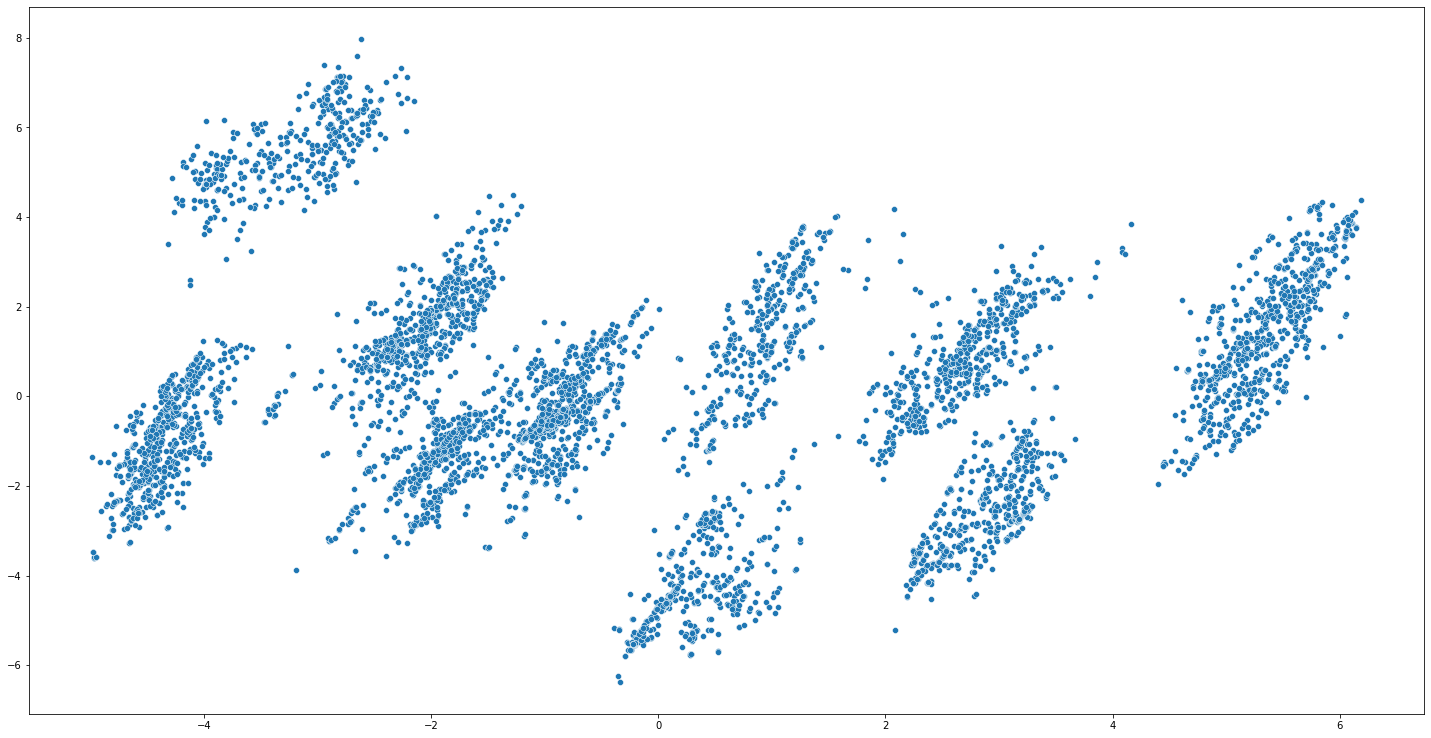

In [ ]:
pca = PCA(n_components=2)
projected = pca.fit_transform(df)
sns.scatterplot(
x=projected[:, 0],
y=projected[:, 1]
)

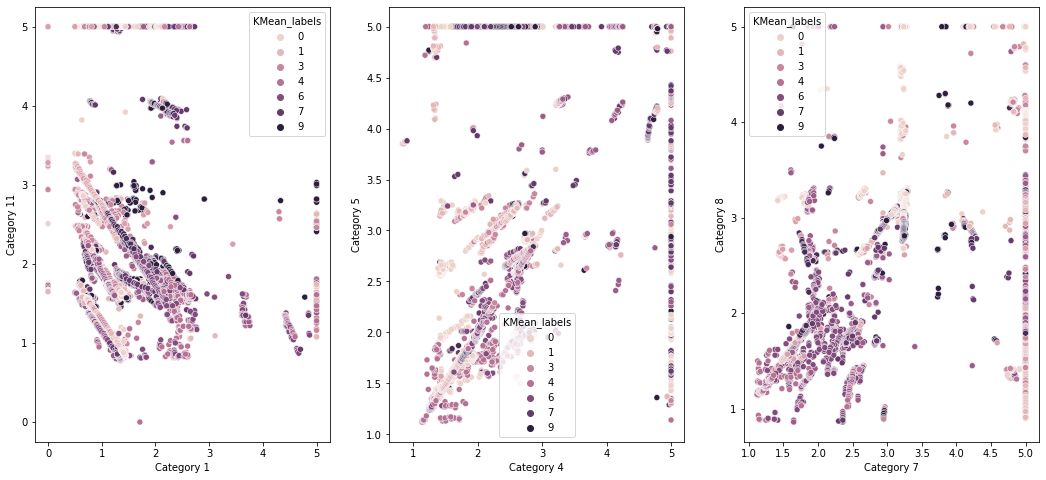

In [ ]:
model = KMeans(n_clusters=10, random_state=1)
model.fit(df)
df['KMean_labels']=model.labels_
fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(18,8))
sns.scatterplot(data=df, x='Category 1', y='Category 11', hue='KMean_labels', ax=ax[0])
sns.scatterplot(data=df, x='Category 4', y='Category 5', hue='KMean_labels', ax=ax[1])
sns.scatterplot(data=df, x='Category 7', y='Category 8', hue='KMean_labels', ax=ax[2])

In [ ]:
df.groupby(['KMean_labels','Category 1']).mean()

Category 2  Category 3  ...  Labels  cluster
KMean_labels Category 1                          ...                 
0            0.00          1.870000    1.862500  ...     1.0      1.0
             0.50          0.980000    3.200000  ...     1.0      1.0
             0.51          1.422000    1.414000  ...     1.0      1.0
             0.52          1.403333    1.420000  ...     1.0      1.0
             0.53          0.982500    1.395000  ...     1.0      1.0
...                             ...         ...  ...     ...      ...
9            2.43          3.795000    2.605000  ...     4.0      4.0
             2.91          1.605000    2.410000  ...     4.0      4.0
             4.33          5.000000    1.640000  ...     4.0      4.0
             4.78          0.750000    2.030000  ...     4.0      4.0
             5.00          3.507143    2.885714  ...     4.0      4.0

[1290 rows x 25 columns]

# Sumaiya Start block


In [ ]:
#Code
#Hierarchical Agglomerative Clustering
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc
%matplotlib inline


In [ ]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00485/google_review_ratings.csv')
data.head(10)


,User,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,Category 11,Category 12,Category 13,Category 14,Category 15,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,Unnamed: 25
0,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.00,2.35,2.33,2.64,1.7,1.69,1.70,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
1,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.00,2.64,2.33,2.65,1.7,1.69,1.70,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
2,User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.00,2.64,2.33,2.64,1.7,1.69,1.70,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
3,User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.00,2.35,2.33,2.64,1.73,1.69,1.70,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
4,User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.00,2.64,2.33,2.64,1.7,1.69,1.70,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
5,User 6,0.0,0.0,3.63,3.63,5.0,2.92,5.00,2.63,2.33,2.65,1.71,1.69,1.69,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
6,User 7,0.0,5.0,3.63,3.63,5.0,2.92,3.03,2.35,2.33,2.64,1.73,1.68,1.69,1.71,1.75,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
7,User 8,0.0,5.0,3.63,3.63,5.0,2.92,5.00,2.63,2.33,2.64,1.7,1.68,1.69,1.71,1.74,0.60,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
8,User 9,0.0,5.0,3.64,3.64,5.0,2.92,3.03,2.62,2.32,2.63,1.71,1.67,1.68,1.70,0.75,0.60,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
9,User 10,0.0,5.0,3.64,3.64,5.0,2.92,5.00,2.35,2.32,2.63,1.69,1.67,1.67,1.70,0.74,0.59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [ ]:
data.shape

(5456, 26)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   User         5456 non-null   object 
 1   Category 1   5456 non-null   float64
 2   Category 2   5456 non-null   float64
 3   Category 3   5456 non-null   float64
 4   Category 4   5456 non-null   float64
 5   Category 5   5456 non-null   float64
 6   Category 6   5456 non-null   float64
 7   Category 7   5456 non-null   float64
 8   Category 8   5456 non-null   float64
 9   Category 9   5456 non-null   float64
 10  Category 10  5456 non-null   float64
 11  Category 11  5456 non-null   object 
 12  Category 12  5455 non-null   float64
 13  Category 13  5456 non-null   float64
 14  Category 14  5456 non-null   float64
 15  Category 15  5456 non-null   float64
 16  Category 16  5456 non-null   float64
 17  Category 17  5456 non-null   float64
 18  Category 18  5456 non-null   float64
 19  Catego

In [ ]:
#the below string bad formatting, so changed it to 0
data.loc[2712,['Category 12']] = 0
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   User         5456 non-null   object 
 1   Category 1   5456 non-null   float64
 2   Category 2   5456 non-null   float64
 3   Category 3   5456 non-null   float64
 4   Category 4   5456 non-null   float64
 5   Category 5   5456 non-null   float64
 6   Category 6   5456 non-null   float64
 7   Category 7   5456 non-null   float64
 8   Category 8   5456 non-null   float64
 9   Category 9   5456 non-null   float64
 10  Category 10  5456 non-null   float64
 11  Category 11  5456 non-null   object 
 12  Category 12  5456 non-null   float64
 13  Category 13  5456 non-null   float64
 14  Category 14  5456 non-null   float64
 15  Category 15  5456 non-null   float64
 16  Category 16  5456 non-null   float64
 17  Category 17  5456 non-null   float64
 18  Category 18  5456 non-null   float64
 19  Catego

In [ ]:
#the below string bad formatting, so changed it to 0
data.loc[2712,['Category 11']] = 0
#changed dtype from obj to float
data['Category 11'] = pd.to_numeric(data['Category 11'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   User         5456 non-null   object 
 1   Category 1   5456 non-null   float64
 2   Category 2   5456 non-null   float64
 3   Category 3   5456 non-null   float64
 4   Category 4   5456 non-null   float64
 5   Category 5   5456 non-null   float64
 6   Category 6   5456 non-null   float64
 7   Category 7   5456 non-null   float64
 8   Category 8   5456 non-null   float64
 9   Category 9   5456 non-null   float64
 10  Category 10  5456 non-null   float64
 11  Category 11  5456 non-null   float64
 12  Category 12  5456 non-null   float64
 13  Category 13  5456 non-null   float64
 14  Category 14  5456 non-null   float64
 15  Category 15  5456 non-null   float64
 16  Category 16  5456 non-null   float64
 17  Category 17  5456 non-null   float64
 18  Category 18  5456 non-null   float64
 19  Catego

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   User         5456 non-null   object 
 1   Category 1   5456 non-null   float64
 2   Category 2   5456 non-null   float64
 3   Category 3   5456 non-null   float64
 4   Category 4   5456 non-null   float64
 5   Category 5   5456 non-null   float64
 6   Category 6   5456 non-null   float64
 7   Category 7   5456 non-null   float64
 8   Category 8   5456 non-null   float64
 9   Category 9   5456 non-null   float64
 10  Category 10  5456 non-null   float64
 11  Category 11  5456 non-null   float64
 12  Category 12  5456 non-null   float64
 13  Category 13  5456 non-null   float64
 14  Category 14  5456 non-null   float64
 15  Category 15  5456 non-null   float64
 16  Category 16  5456 non-null   float64
 17  Category 17  5456 non-null   float64
 18  Category 18  5456 non-null   float64
 19  Catego

In [ ]:
#check for missing value
data.isnull().sum()

User              0
Category 1        0
Category 2        0
Category 3        0
Category 4        0
Category 5        0
Category 6        0
Category 7        0
Category 8        0
Category 9        0
Category 10       0
Category 11       0
Category 12       0
Category 13       0
Category 14       0
Category 15       0
Category 16       0
Category 17       0
Category 18       0
Category 19       0
Category 20       0
Category 21       0
Category 22       0
Category 23       0
Category 24       1
Unnamed: 25    5454
dtype: int64

In [ ]:
data['Category 24'] = data['Category 24'].replace(np.NaN, data['Category 24'].mean())
data.isnull().sum()

User              0
Category 1        0
Category 2        0
Category 3        0
Category 4        0
Category 5        0
Category 6        0
Category 7        0
Category 8        0
Category 9        0
Category 10       0
Category 11       0
Category 12       0
Category 13       0
Category 14       0
Category 15       0
Category 16       0
Category 17       0
Category 18       0
Category 19       0
Category 20       0
Category 21       0
Category 22       0
Category 23       0
Category 24       0
Unnamed: 25    5454
dtype: int64

In [ ]:
data.drop(['Unnamed: 25'],axis=1,inplace=True)
#tmp_df = data.copy()
data.drop(['User',],axis=1,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Category 1   5456 non-null   float64
 1   Category 2   5456 non-null   float64
 2   Category 3   5456 non-null   float64
 3   Category 4   5456 non-null   float64
 4   Category 5   5456 non-null   float64
 5   Category 6   5456 non-null   float64
 6   Category 7   5456 non-null   float64
 7   Category 8   5456 non-null   float64
 8   Category 9   5456 non-null   float64
 9   Category 10  5456 non-null   float64
 10  Category 11  5456 non-null   float64
 11  Category 12  5456 non-null   float64
 12  Category 13  5456 non-null   float64
 13  Category 14  5456 non-null   float64
 14  Category 15  5456 non-null   float64
 15  Category 16  5456 non-null   float64
 16  Category 17  5456 non-null   float64
 17  Category 18  5456 non-null   float64
 18  Category 19  5456 non-null   float64
 19  Catego

In [ ]:
#missing value handling
#null detector

is_NaN = data.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = data[row_has_NaN]
rows_with_NaN

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,Category 11,Category 12,Category 13,Category 14,Category 15,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24


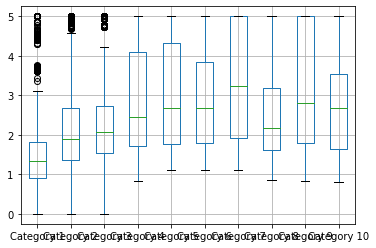

In [ ]:
data.boxplot(column=['Category 1', 'Category 2', 'Category 3', 'Category 4', 'Category 5', 'Category 6', 'Category 7', 'Category 8', 'Category 9','Category 10'])



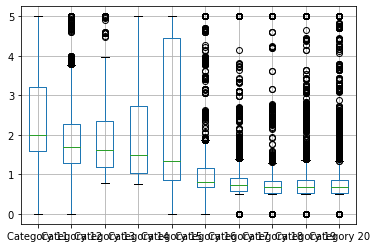

In [ ]:
data.boxplot(column=['Category 11', 'Category 12', 'Category 13', 'Category 14', 'Category 15', 'Category 16', 'Category 17', 'Category 18', 'Category 19','Category 20'])


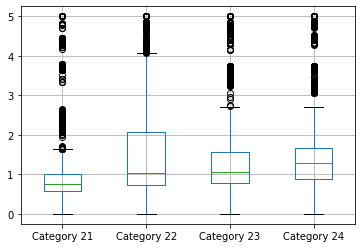

In [ ]:
data.boxplot(column=['Category 21', 'Category 22', 'Category 23', 'Category 24'])

In [ ]:
data.describe()

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,Category 11,Category 12,Category 13,Category 14,Category 15,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24
count,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.00000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000
mean,1.455720,2.319707,2.489331,2.796886,2.958941,2.89349,3.351395,2.540795,3.126019,2.832729,2.549604,2.077958,2.125511,2.190861,2.206573,1.192801,0.949203,0.822414,0.969811,1.000071,0.965838,1.750537,1.531453,1.560755
std,0.827604,1.421438,1.247815,1.309159,1.339056,1.28240,1.413492,1.111391,1.356802,1.307665,1.382074,1.249411,1.406542,1.576686,1.715961,1.107005,0.973536,0.947911,1.203972,1.193891,0.929853,1.598734,1.316889,1.171649
min,0.000000,0.000000,0.000000,0.830000,1.120000,1.11000,1.120000,0.860000,0.840000,0.810000,0.000000,0.000000,0.770000,0.760000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.920000,1.360000,1.540000,1.730000,1.770000,1.79000,1.930000,1.620000,1.800000,1.640000,1.580000,1.290000,1.190000,1.030000,0.860000,0.690000,0.580000,0.530000,0.520000,0.540000,0.570000,0.740000,0.790000,0.880000
50%,1.340000,1.905000,2.060000,2.460000,2.670000,2.68000,3.230000,2.170000,2.800000,2.680000,2.000000,1.690000,1.610000,1.490000,1.330000,0.800000,0.740000,0.690000,0.690000,0.690000,0.760000,1.030000,1.070000,1.290000
75%,1.810000,2.682500,2.740000,4.092500,4.312500,3.84000,5.000000,3.190000,5.000000,3.530000,3.220000,2.282500,2.360000,2.740000,4.440000,1.160000,0.910000,0.840000,0.860000,0.860000,1.000000,2.070000,1.560000,1.660000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [ ]:
# Scale the data and normalize
#
sc = StandardScaler()
data_scaled = sc.fit_transform(data)
data_normalized = normalize(data_scaled)

In [ ]:
data.isnull().any()

In [ ]:
#Predicting clusters before PCA
#clusters = pd.DataFrame(model.fit_predict(data))
#data["Cluster"] = clusters
data['Cluster'].value_counts()

0    1617
1    1191
3    1122
2    1043
4     483
Name: Cluster, dtype: int64

In [ ]:
#Reducing the dimensionality of the Data (PCA)

pca = PCA(n_components = 2)
X_principal = pca.fit_transform(data)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']

In [ ]:

#Predicting clusters
#clusters = pd.DataFrame(model.fit_predict(X_principal))
#data["Cluster"] = clusters
frame['Cluster'].value_counts()

1    1831
0    1126
2    1024
4     933
3     542
Name: Cluster, dtype: int64

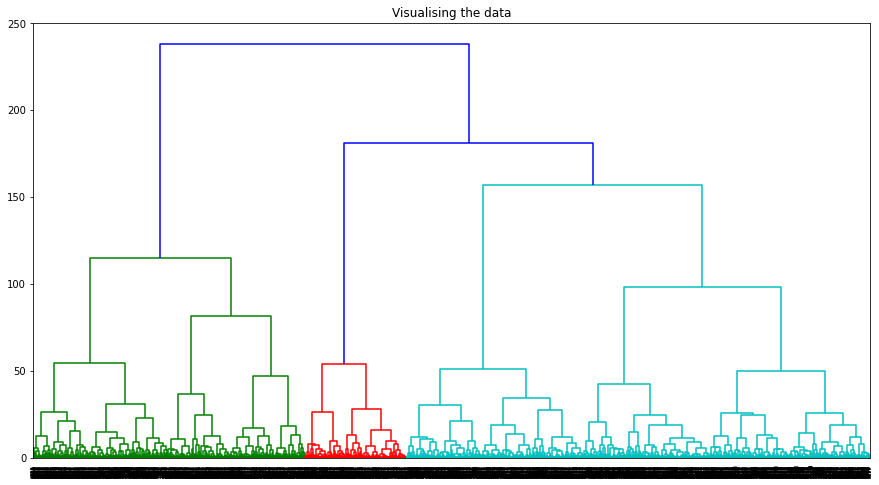

In [ ]:
#Visualizing the working of the Dendograms

plt.figure(figsize =(15, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward')))

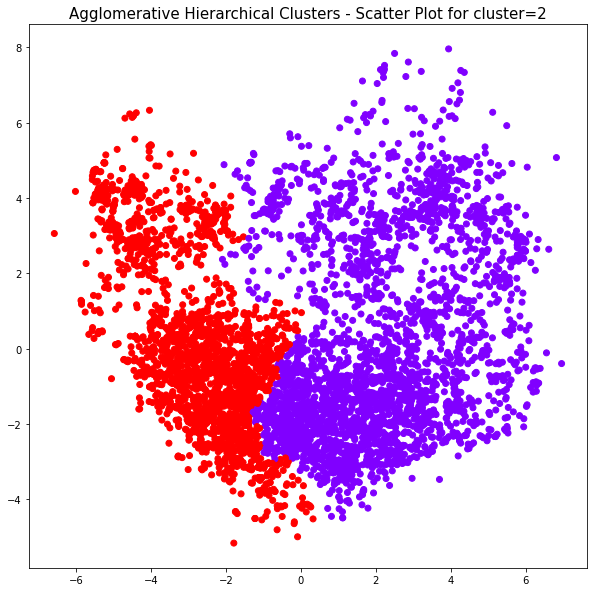

In [ ]:
#Building and Visualizing the different clustering models for 
#different values of k
# k=2
ac2 = AgglomerativeClustering(n_clusters = 2)
  
plt.figure(figsize =(10, 10))
plt.scatter(X_principal['P1'], X_principal['P2'],
           c = ac2.fit_predict(X_principal), cmap ='rainbow')
plt.title("Agglomerative Hierarchical Clusters - Scatter Plot for cluster=2", fontsize=15)
plt.show()

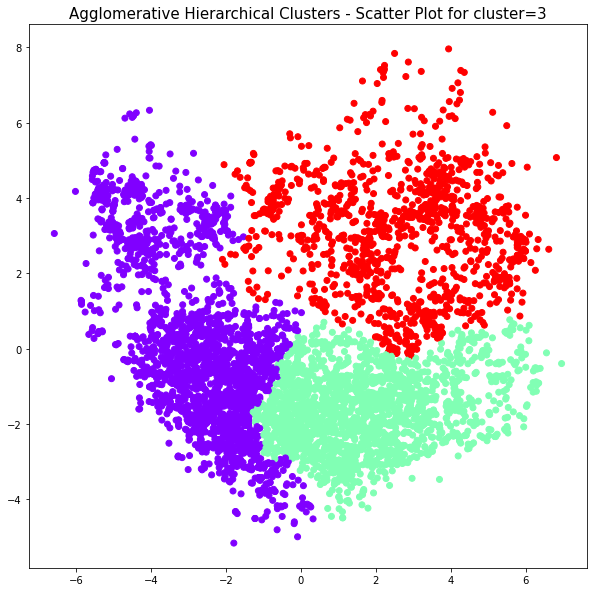

In [ ]:
#k=3
ac3 = AgglomerativeClustering(n_clusters = 3)
  
plt.figure(figsize =(10, 10))
plt.scatter(X_principal['P1'], X_principal['P2'],
           c = ac3.fit_predict(X_principal), cmap ='rainbow')
plt.title("Agglomerative Hierarchical Clusters - Scatter Plot for cluster=3", fontsize=15)
plt.show()

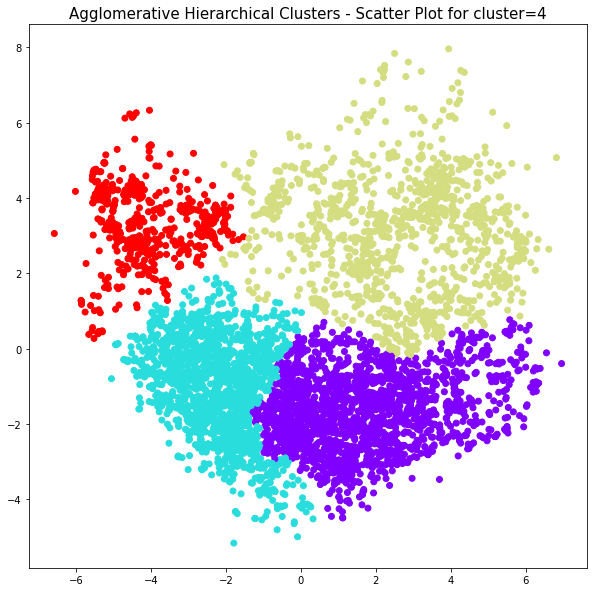

In [ ]:
# k =4
ac4 = AgglomerativeClustering(n_clusters = 4)
  
plt.figure(figsize =(10, 10))
plt.scatter(X_principal['P1'], X_principal['P2'],
            c = ac4.fit_predict(X_principal), cmap ='rainbow')
plt.title("Agglomerative Hierarchical Clusters - Scatter Plot for cluster=4", fontsize=15)
plt.show()
#ac4.describe(include='all').loc['mean'] < 1
#ac4.corr() ## Heat map to be generated

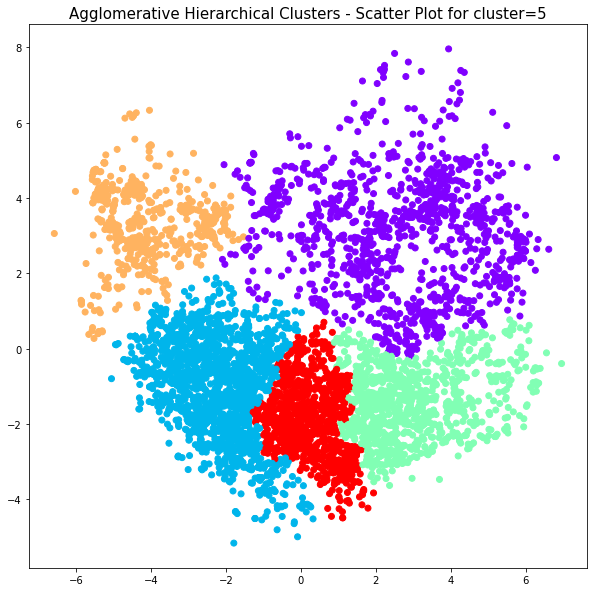

In [ ]:
#k=5
ac5 = AgglomerativeClustering(n_clusters = 5)
  
plt.figure(figsize =(10, 10))
plt.scatter(X_principal['P1'], X_principal['P2'],
           c = ac5.fit_predict(X_principal), cmap ='rainbow')
plt.title("Agglomerative Hierarchical Clusters - Scatter Plot for cluster=5", fontsize=15)
plt.show()

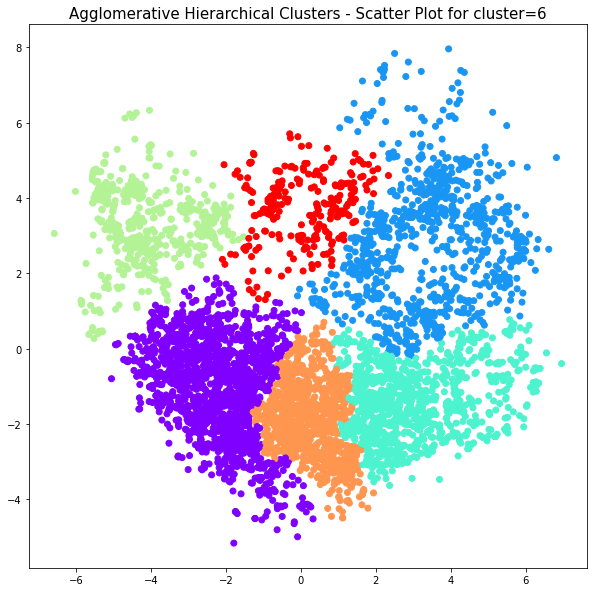

In [ ]:
k=6
ac6 = AgglomerativeClustering(n_clusters = 6)
  
plt.figure(figsize =(10, 10))
plt.scatter(X_principal['P1'], X_principal['P2'],
           c = ac6.fit_predict(X_principal), cmap ='rainbow')
plt.title("Agglomerative Hierarchical Clusters - Scatter Plot for cluster=6", fontsize=15)
plt.show()
#print(ac6)

In [ ]:
#with PCA finding silhouette_score and calinski_harabasz_score
clus=[ac2, ac3, ac4, ac5, ac6]
k=2;
d2=data
for i in clus:
  print("k=",k)
  start_time = time.time()
  print("Agglomerative Execution Time: %s seconds" % (time.time() - start_time))
  print("Agglomerative silhouette_score: ", silhouette_score(X_principal, i.fit_predict(X_principal)))
  #calinski_harabasz_score code 
  yhat = i.fit(d2)
  d2['Labels'] = yhat.labels_
  print("Agglomerative - calinski_harabasz_score : %0.3f" %metrics.calinski_harabasz_score(d2.iloc[:,:-1], d2['Labels']))
  k=k+1

k= 2
Agglomerative Execution Time: 1.430511474609375e-06 seconds
Agglomerative silhouette_score:  0.354980997313241
Agglomerative - calinski_harabasz_score : 798.055
k= 3
Agglomerative Execution Time: 1.1920928955078125e-06 seconds
Agglomerative silhouette_score:  0.3804545505115842
Agglomerative - calinski_harabasz_score : 750.628
k= 4
Agglomerative Execution Time: 9.5367431640625e-07 seconds
Agglomerative silhouette_score:  0.40001460123687843
Agglomerative - calinski_harabasz_score : 685.548
k= 5
Agglomerative Execution Time: 1.9073486328125e-06 seconds
Agglomerative silhouette_score:  0.33243937997647977
Agglomerative - calinski_harabasz_score : 614.996
k= 6
Agglomerative Execution Time: 1.6689300537109375e-06 seconds
Agglomerative silhouette_score:  0.31747550399023067
Agglomerative - calinski_harabasz_score : 563.286


In [ ]:
#silhouette_score(X_principal, ac3.fit_predict(X_principal))

In [ ]:
#silhouette_score(X_principal, ac4.fit_predict(X_principal))

In [ ]:
#silhouette_score(X_principal, ac5.fit_predict(X_principal))

In [ ]:
#silhouette_score(X_principal, ac6.fit_predict(X_principal))

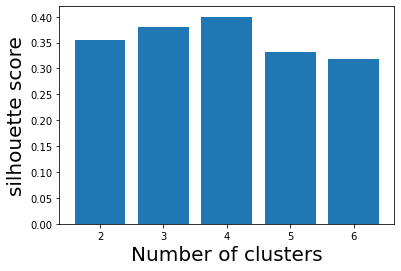

In [ ]:
#Evaluating the different models and Visualizing the results.
k = [2, 3, 4, 5, 6]
  
# Appending the silhouette scores of the different models to the list
silhouette_scores = []
silhouette_scores.append(
        silhouette_score(X_principal, ac2.fit_predict(X_principal)))
silhouette_scores.append(
        silhouette_score(X_principal, ac3.fit_predict(X_principal)))
silhouette_scores.append(
        silhouette_score(X_principal, ac4.fit_predict(X_principal)))
silhouette_scores.append(
        silhouette_score(X_principal, ac5.fit_predict(X_principal)))
silhouette_scores.append(
        silhouette_score(X_principal, ac6.fit_predict(X_principal)))
  
# Plotting a bar graph to compare the results
plt.bar(k, silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 20)
plt.ylabel('silhouette score', fontsize = 20)
plt.show()

#it is concluded that the optimal number of clusters for the given data and clustering technique is 4

In [ ]:
#ac4 = AgglomerativeClustering(n_clusters = 4)
#cluster_labels=ac4.fit_predict(X_principal)
#ac4 = data[data['cluster_labels']==4]
#ac4.describe(include='all').loc['mean'] < 1
data.describe(include='all').loc['mean'] < 1

Category 1     False
Category 2     False
Category 3     False
Category 4     False
Category 5     False
Category 6     False
Category 7     False
Category 8     False
Category 9     False
Category 10    False
Category 11    False
Category 12    False
Category 13    False
Category 14    False
Category 15    False
Category 16    False
Category 17     True
Category 18     True
Category 19     True
Category 20    False
Category 21     True
Category 22    False
Category 23    False
Category 24    False
Name: mean, dtype: bool

# Sumaiya End Block

# Jyothi Start block


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.cluster import DBSCAN
from sklearn import metrics


In [ ]:
DBSCAN_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00485/google_review_ratings.csv')
#DBSCAN_df.head(10)
from sklearn.cluster import DBSCAN
#help(DBSCAN)
DBSCAN_df.loc[2712,['Category 11']] =0
DBSCAN_df['Category 11'] =pd.to_numeric(DBSCAN_df['Category 11'])
DBSCAN_df=DBSCAN_df.set_index('User')
DBSCAN_df['Category 12'] = DBSCAN_df['Category 12'].fillna(0)
DBSCAN_df['Category 24'] = DBSCAN_df['Category 24'].fillna(0)
DBSCAN_df.drop("Unnamed: 25",axis=1,inplace=True)

In [ ]:
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(algorithm='auto').fit(DBSCAN_df)
distances, indices = nbrs.kneighbors(DBSCAN_df)
distances

array([[0.        , 0.28124722, 0.29017236, 0.29068884, 0.29068884],
       [0.        , 0.02236068, 0.02236068, 0.02645751, 0.29017236],
       [0.        , 0.        , 0.02      , 0.02236068, 0.29068884],
       ...,
       [0.        , 1.50794562, 3.49114594, 4.06918911, 4.2121491 ],
       [0.        , 1.16133544, 1.28296532, 3.91573748, 4.16140601],
       [0.        , 1.50794562, 3.79828909, 4.09388568, 4.2571117 ]])

# **IDentifying Epsilon Value using Elbow**

In [ ]:
distances, indices = nbrs.kneighbors(DBSCAN_df)
#plt.figure(figsize=(12,6),dpi=200)
distances = np.sort(distances, axis=0)
distances = distances[:,3]
distances
#plt.plot(distances,'--')
#!pip install kneed
from kneed import KneeLocator
i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')
fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")
print(distances[knee.knee])

ModuleNotFoundError: ignored

# IDentifying "Min points" for Identified *eps* Value using Elbow

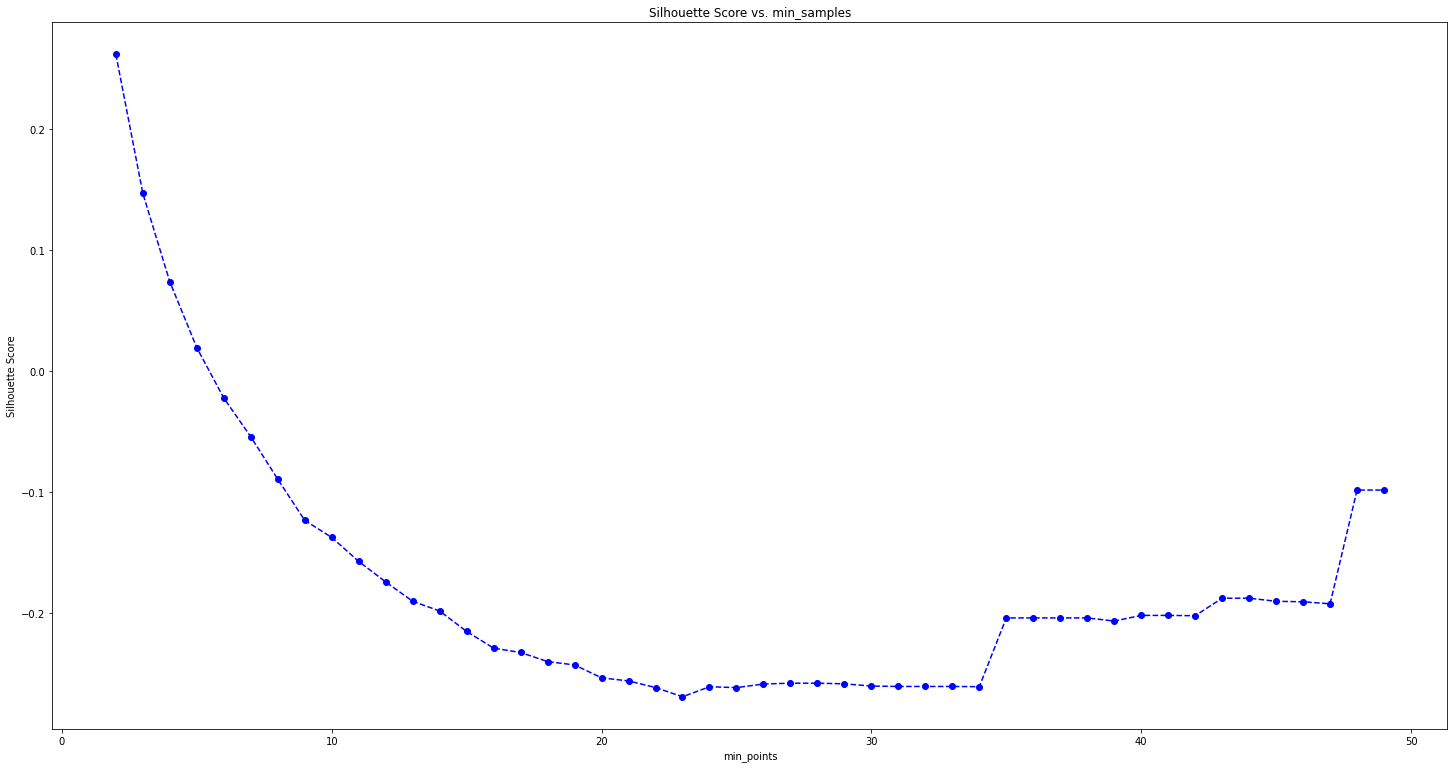

In [ ]:
# Silhouette Score for DBSCAN

from sklearn.metrics import silhouette_score 
from sklearn.cluster import DBSCAN

def get_dbscan_score(data, center):
    '''
    
    INPUT:
        data - the dataset you want to fit kmeans to
        center - the number of centers you want (the k value)
    OUTPUT:
        score - the Silhouette Score for DBSCAN
    '''
    #print('new center : ',center)
    #instantiate kmeans
    dbscan = DBSCAN(eps= 1.6323908845616897, min_samples=center)

    # Then fit the model to your data using the fit method
    model = dbscan.fit(DBSCAN_df)
    
    # Calculate Silhoutte Score

    score = silhouette_score(DBSCAN_df, model.labels_, metric='euclidean')
    #print (center,score)
    return score

scores = []
centers = list(range(2,50))

for center in centers:
    scores.append(get_dbscan_score(DBSCAN_df, center))
    
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('min_points');
plt.ylabel('Silhouette Score');
plt.title('Silhouette Score vs. min_samples');

In [ ]:
#eps_list=np.arange(start=0.9, stop=2, step=0.1)
#min_sample_list=np.arange(start=2, stop=5, step=1)
#0	0.268653	eps:1.7 min_sample :2


#eps_list=np.arange(start=0.9, stop=2, step=0.1)
#min_sample_list=np.arange(start=5, stop=50, step=1)
##	score	parameters
#0	0.103402	eps:1.5 min_sample :47


# Defining the list of hyperparameters to try
# eps_list=np.arange(start=1.03, stop=1.35, step=0.01)
# min_sample_list=np.arange(start=2, stop=50, step=1)
##	score	parameters
#0	0.103402	eps:1.5 min_sample :47

# Defining the list of hyperparameters to try
#eps_list=np.arange(start=1.03, stop=1.35, step=0.01)
#min_sample_list=np.arange(start=2, stop=50, step=1)

#0.220062	eps:1.4 min_sample :2


# Defining the list of hyperparameters to try
#eps_list=np.arange(start=1.3, stop=1.6, step=0.1)
#min_sample_list=np.arange(start=2, stop=50, step=1)


##score	parameters
#0	0.255512	eps:1.6 min_sample :2

# Identify Epsilon value and Min Points values by looping through the different ranges and step size

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

# Defining the list of hyperparameters to try
eps_list=np.arange(start=1.3, stop=1.6, step=0.1)
min_sample_list=np.arange(start=2, stop=5, step=1)

# Creating empty data frame to store the silhouette scores for each trials
silhouette_scores_data=pd.DataFrame()

for eps_trial in eps_list:
    for min_sample_trial in min_sample_list:
       
        # Generating DBSAN clusters
        db = DBSCAN(eps=eps_trial, min_samples=min_sample_trial)
        
        if(len(np.unique(db.fit_predict(DBSCAN_df)))>1):
            sil_score=silhouette_score(DBSCAN_df, db.fit_predict(DBSCAN_df))
            #print(eps_trial,min_sample_trial)
        else:
            continue
        trial_parameters="eps:" + str(eps_trial.round(1)) +" min_sample :" + str(min_sample_trial)
        
        silhouette_scores_data=silhouette_scores_data.append(pd.DataFrame(data=[[sil_score,trial_parameters]], columns=["score", "parameters"]))

# Finding out the best hyperparameters with highest Score
silhouette_scores_data.sort_values(by='score', ascending=False).head(1)

,score,parameters
0,0.255512,eps:1.6 min_sample :2


Text(0.5, 0, 'Epsilon Value')

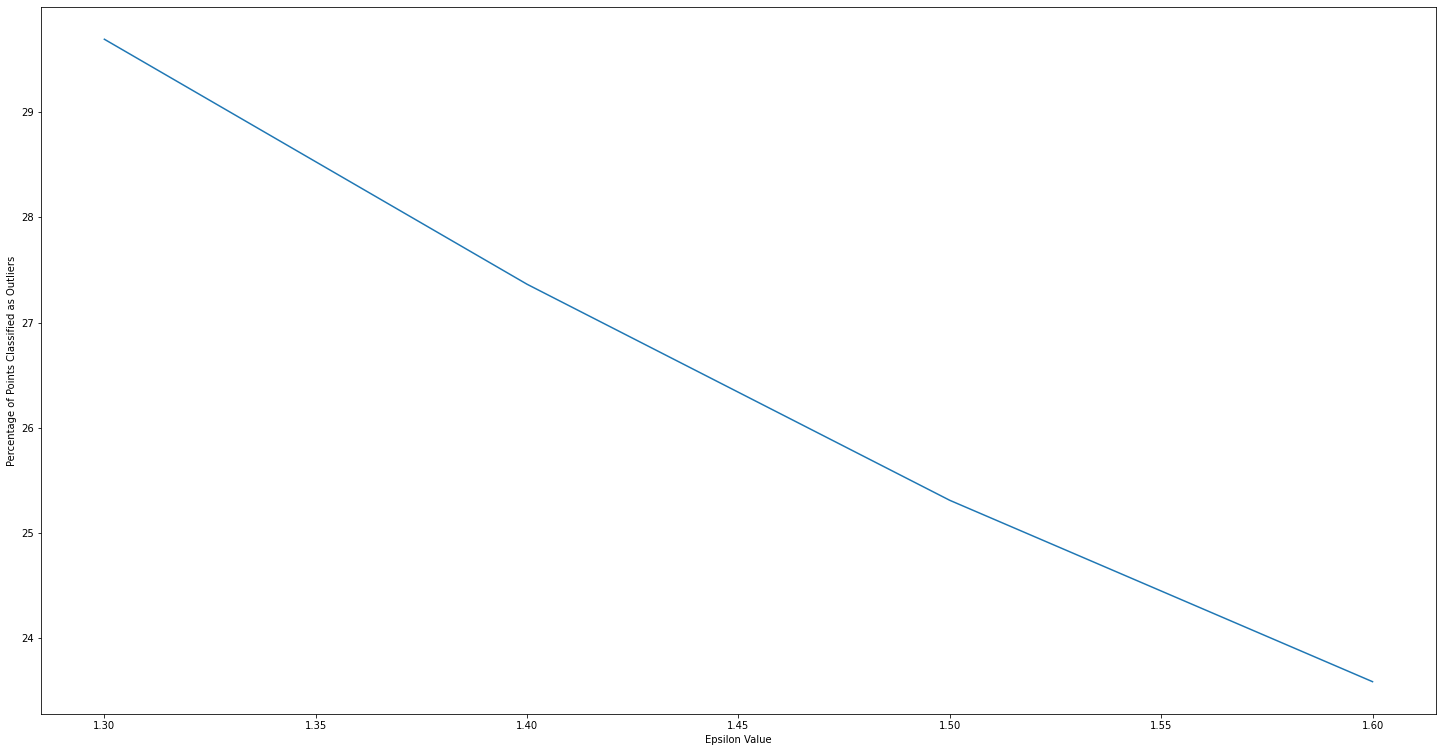

In [ ]:
## Epsilon 0.001,2,50
outlier_percent = []
eps_list=np.arange(start=1.3, stop=1.6, step=0.1)
for eps in eps_list:
    # Create Model
    dbscan = DBSCAN(eps=eps,min_samples=2)
    dbscan.fit(DBSCAN_df)
     
    # Log percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    
    outlier_percent.append(perc_outliers)
sns.lineplot(x=np.arange(start=1.3, stop=1.6, step=0.1),y=outlier_percent)
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Epsilon Value")

In [ ]:
DBSCAN_df['Labels'] = dbscan.labels_
DBSCAN_df.head()

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,Category 11,Category 12,Category 13,Category 14,Category 15,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,Labels
User,,,,,,,,,,,,,,,,,,,,,,,,,
User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64,1.70,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0
User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65,1.70,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0
User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,1.70,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0
User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64,1.73,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0
User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,1.70,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
DBSCAN_df[DBSCAN_df['Labels']== 45].info()

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, User 209 to User 3840
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Category 1   27 non-null     float64
 1   Category 2   27 non-null     float64
 2   Category 3   27 non-null     float64
 3   Category 4   27 non-null     float64
 4   Category 5   27 non-null     float64
 5   Category 6   27 non-null     float64
 6   Category 7   27 non-null     float64
 7   Category 8   27 non-null     float64
 8   Category 9   27 non-null     float64
 9   Category 10  27 non-null     float64
 10  Category 11  27 non-null     float64
 11  Category 12  27 non-null     float64
 12  Category 13  27 non-null     float64
 13  Category 14  27 non-null     float64
 14  Category 15  27 non-null     float64
 15  Category 16  27 non-null     float64
 16  Category 17  27 non-null     float64
 17  Category 18  27 non-null     float64
 18  Category 19  27 non-null     float64
 19  C

In [ ]:
cluster_45 = DBSCAN_df[DBSCAN_df['Labels']== 45]
cluster_45.describe(include='all').loc['mean'] < 1

Category 1     False
Category 2     False
Category 3     False
Category 4     False
Category 5     False
Category 6     False
Category 7     False
Category 8     False
Category 9     False
Category 10    False
Category 11    False
Category 12    False
Category 13    False
Category 14    False
Category 15    False
Category 16     True
Category 17     True
Category 18     True
Category 19     True
Category 20     True
Category 21     True
Category 22    False
Category 23    False
Category 24    False
Labels         False
Name: mean, dtype: bool

Needs to be worked for improvement

---


Category 16     ,
Category 17     ,
Category 18     ,
Category 19     ,
Category 20     ,
Category 21     ,
Category 22     ,

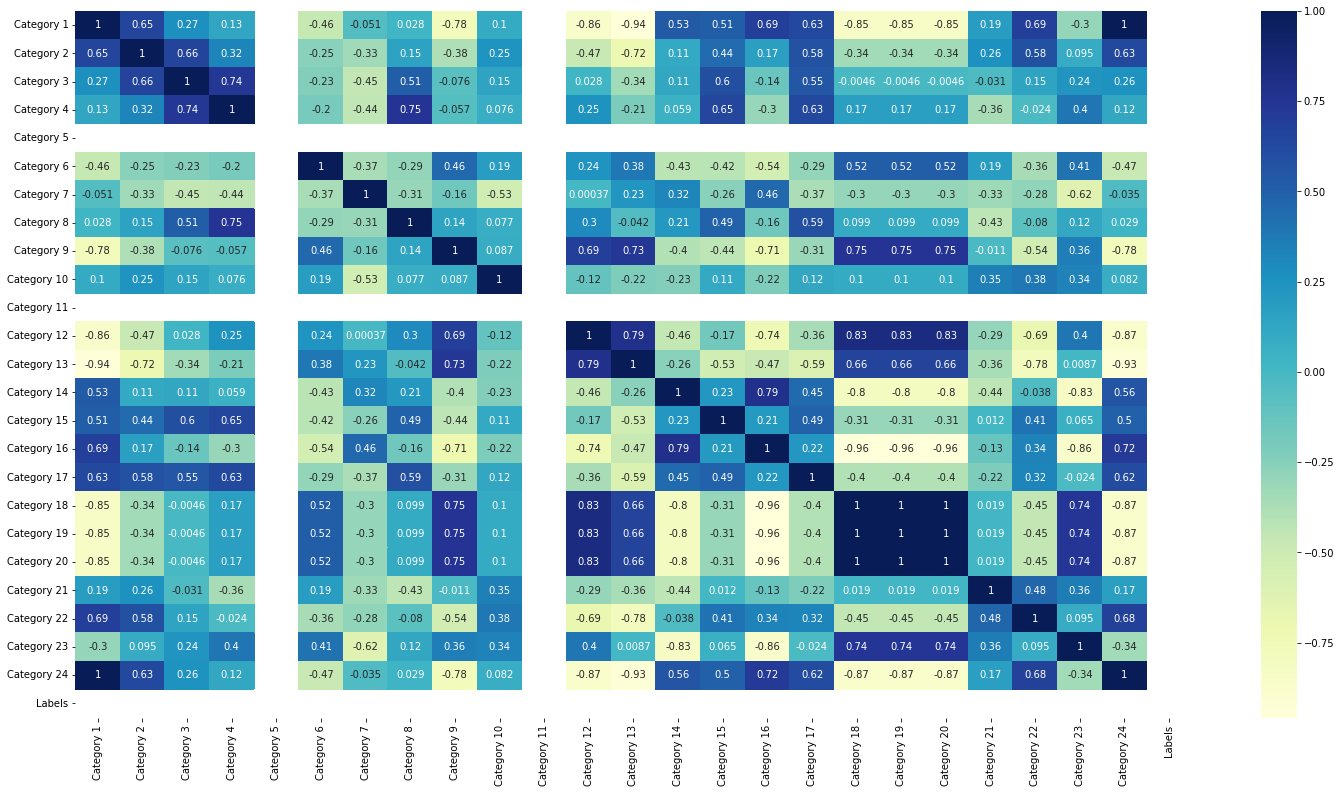

In [ ]:
#find correlation of the structure
plt.rcParams["figure.figsize"] = (25,13)
sns.heatmap(cluster_45.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.cluster import DBSCAN
from sklearn import metrics

# Shilloute Performance Metrics & Time Complexity Performance Metrics

In [ ]:
df1 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00485/google_review_ratings.csv')
#DBSCAN_df.head(10)
from sklearn.cluster import DBSCAN
#help(DBSCAN)
df1.loc[2712,['Category 11']] =0
df1['Category 11'] =pd.to_numeric(df1['Category 11'])
df1=df1.set_index('User')
df1['Category 12'] = df1['Category 12'].fillna(0)
df1['Category 24'] = df1['Category 24'].fillna(0)
df1.drop("Unnamed: 25",axis=1,inplace=True)

In [ ]:
## Performance metrics
## Performance metrics
#time taken to generate clusters with optimal values::
## Epsilon 0.001,2,50
import time
from sklearn.cluster import KMeans
df=df1
start_time = time.time()
model = KMeans(n_clusters= 4)
cluster_labels = model.fit_predict(df)
print("KMeans Execution --- %s seconds ---" % (time.time() - start_time))
df['Labels']=cluster_labels
print("KMEANS - silhouette_score: %0.3f" % metrics.silhouette_score(df.iloc[:,:-1], df['Labels']))
print("KMEANS - calinski_harabasz_score : %0.3f" %metrics.calinski_harabasz_score(df.iloc[:,:-1], df['Labels']))


KMeans Execution --- 0.27536988258361816 seconds ---
KMEANS - silhouette_score: 0.147
KMEANS - calinski_harabasz_score : 781.254


In [ ]:
import time
DBSCAN_df = df1
start_time = time.time()
dbscan = DBSCAN(eps=1.6323908845616897,min_samples=2)
dbscan.fit(DBSCAN_df)
print("DBSCAN --- %s seconds ---" % (time.time() - start_time))
DBSCAN_df['Labels'] = dbscan.labels_
print("DBSCAN - silhouette_score: %0.3f" % metrics.silhouette_score(DBSCAN_df.iloc[:,:-1], DBSCAN_df['Labels']))
print("DBSCAN - calinski_harabasz_score : %0.3f" %metrics.calinski_harabasz_score(DBSCAN_df.iloc[:,:-1], DBSCAN_df['Labels']))


DBSCAN --- 0.9026002883911133 seconds ---
DBSCAN - silhouette_score: 0.257
DBSCAN - calinski_harabasz_score : 16.745


In [ ]:
from sklearn.cluster import AgglomerativeClustering
import time
df2=df1
start_time = time.time()
k = [2,3,4,5,6]
for i in k:
  ac = AgglomerativeClustering(n_clusters = i)
  print("FOR K= ",i)
  yhat = ac.fit(df2)
  df2['Labels'] = yhat.labels_
  print("Agglomerative --- %s seconds ---" % (time.time() - start_time))
  print("Agglomerative - silhouette_score: %0.3f" % metrics.silhouette_score(df2, df2['Labels']))
  print("Agglomerative - calinski_harabasz_score : %0.3f" %metrics.calinski_harabasz_score(df2.iloc[:,:-1], df2['Labels']))

FOR K=  2
Agglomerative --- 1.0868608951568604 seconds ---
Agglomerative - silhouette_score: 0.126
Agglomerative - calinski_harabasz_score : 794.508
FOR K=  3
Agglomerative --- 2.8383724689483643 seconds ---
Agglomerative - silhouette_score: 0.134
Agglomerative - calinski_harabasz_score : 745.931
FOR K=  4
Agglomerative --- 4.581785202026367 seconds ---
Agglomerative - silhouette_score: 0.140
Agglomerative - calinski_harabasz_score : 679.552
FOR K=  5
Agglomerative --- 6.32027792930603 seconds ---
Agglomerative - silhouette_score: 0.153
Agglomerative - calinski_harabasz_score : 629.708
FOR K=  6
Agglomerative --- 8.078773021697998 seconds ---
Agglomerative - silhouette_score: 0.161
Agglomerative - calinski_harabasz_score : 584.108


From the above performance analysis we can conclude that DB Scan algorithm performs well when compared  with K Means,DBScan and agglomerative clustering as 
it has highest silhouette_score and lowest Time execution time. 



System Configuration Check

In [ ]:
import platform

In [ ]:
platform.machine()

'x86_64'

In [ ]:
platform.version()

'#1 SMP Sat Jun 5 09:50:34 PDT 2021'

In [ ]:
 platform.uname()

uname_result(system='Linux', node='0e3b2a06f654', release='5.4.104+', version='#1 SMP Sat Jun 5 09:50:34 PDT 2021', machine='x86_64', processor='x86_64')

In [ ]:
platform.system()

'Linux'

In [ ]:
platform.processor()

'x86_64'

In [ ]:
!pip install py-cpuinfo
import cpuinfo
#cpuinfo.cpu.info[0]['model name']
#'Intel(R) Pentium(R) 4 CPU 3.60GHz'

     |████████████████████████████████| 99 kB 6.8 MB/s 
  Created wheel for py-cpuinfo: filename=py_cpuinfo-8.0.0-py3-none-any.whl size=22258 sha256=c23bdd147249cf64784e6037bb132077af91780d6e83b5e88c8dace1ac66d779
  Stored in directory: /root/.cache/pip/wheels/d2/f1/1f/041add21dc9c4220157f1bd2bd6afe1f1a49524c3396b94401
Successfully built py-cpuinfo


In [ ]:
from cpuinfo import get_cpu_info

print(get_cpu_info())

{'python_version': '3.7.12.final.0 (64 bit)', 'cpuinfo_version': [8, 0, 0], 'cpuinfo_version_string': '8.0.0', 'arch': 'X86_64', 'bits': 64, 'count': 2, 'arch_string_raw': 'x86_64', 'vendor_id_raw': 'GenuineIntel', 'brand_raw': 'Intel(R) Xeon(R) CPU @ 2.20GHz', 'hz_advertised_friendly': '2.2000 GHz', 'hz_actual_friendly': '2.2000 GHz', 'hz_advertised': [2200000000, 0], 'hz_actual': [2199998000, 0], 'model': 79, 'family': 6, 'flags': ['3dnowprefetch', 'abm', 'adx', 'aes', 'apic', 'arat', 'arch_capabilities', 'avx', 'avx2', 'bmi1', 'bmi2', 'clflush', 'cmov', 'constant_tsc', 'cpuid', 'cx16', 'cx8', 'de', 'erms', 'f16c', 'fma', 'fpu', 'fsgsbase', 'fxsr', 'hle', 'ht', 'hypervisor', 'ibpb', 'ibrs', 'invpcid', 'invpcid_single', 'lahf_lm', 'lm', 'mca', 'mce', 'md_clear', 'mmx', 'movbe', 'msr', 'mtrr', 'nonstop_tsc', 'nopl', 'nx', 'osxsave', 'pae', 'pat', 'pcid', 'pclmulqdq', 'pdpe1gb', 'pge', 'pni', 'popcnt', 'pse', 'pse36', 'rdrand', 'rdrnd', 'rdseed', 'rdtscp', 'rep_good', 'rtm', 'sep', 'sma

# Jyothi End Block